In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [33]:
pwd

'C:\\Users\\dell\\Desktop\\phishing_classifier'

In [34]:
df = pd.read_csv("phishing_data.csv")
df.head()

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1     3            1            5          72        0      
1   2     3            1            3         144        0      
2   3     3            1            2          58        0      
3   4     3            1            6          79        1      
4   5     3            0            4          46        0      

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0          0              0          0             0             0       
1          0              0          0             2             0       
2          0              0          0             0             0       
3          0              0          0             0             0       
4          0              0          0             0             0       

   NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0           0                0          0            0            1      
1           2                1          0           41            1      
2           0                0          0            0            1      
3           0                0          0            0            1      
4           0                0          0            2            1      

   RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0        0           0               0                0         
1        0           0               0                0         
2        0           0               0                0         
3        0           0               0                1         
4        1           0               0                1         

   HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0         0               21            44            0       
1         0               17            16          103       
2         0               27            24            0       
3         0               22            50            0       
4         0               10            29            0       

   DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
0          0                  0                  0                0.000        
1          0                  1                  0                0.000        
2          0                  0                  0                0.375        
3          0                  0                  1                1.000        
4          0                  0                  0                1.000        

   PctExtResourceUrls  ExtFavicon  InsecureForms  RelativeFormAction  \
0       0.250000            1            1                 0           
1       0.000000            0            1                 0           
2       1.000000            1            1                 0           
3       0.095238            1            1                 0           
4       1.000000            0            0                 0           

   ExtFormAction  AbnormalFormAction  PctNullSelfRedirectHyperlinks  \
0        0                 0                       0.0                
1        0                 0                       0.0                
2        0                 0                       0.0                
3        0                 0                       0.0                
4        1                 0                       0.0                

   FrequentDomainNameMismatch  FakeLinkInStatusBar  RightClickDisabled  \
0               0                       0                    0           
1               0                       0                    0           
2               0                       0                    0           
3               1                       0                    0           
4               1                       0                    0           

   PopUpWindow  SubmitInfoToEmail  IframeOrFrame  MissingTitle  \
0       0               0                0              0        
1       0               0         

In [35]:
df.shape

(10000, 50)

In [36]:
df.tail()

id    NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
9995   9996     3            1            1         50         0      
9996   9997     2            1            4         59         1      
9997   9998     2            1            4         57         0      
9998   9999     3            1            1         49         0      
9999  10000     3            1            2         52         3      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
9995          0              0          0             0             0       
9996          0              0          0             0             0       
9997          0              0          0             0             0       
9998          0              0          0             0             0       
9999          0              0          0             0             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
9995           2                1          0            9            1      
9996           0                0          0            0            1      
9997           0                0          0            6            1      
9998           1                0          0            3            1      
9999           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
9995        0           0               0                0         
9996        1           0               0                1         
9997        1           0               0                0         
9998        0           0               0                0         
9999        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
9995         0               15            10          17        
9996         0               19            33           0        
9997         0               16            34           0        
9998         0               15            13          13        
9999         0               10            35           0        

      DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  \
9995          0                  0                  0           
9996          0                  0                  0           
9997          0                  0                  0           
9998          0                  0                  0           
9999          0                  0                  0           

      PctExtHyperlinks  PctExtResourceUrls  ExtFavicon  InsecureForms  \
9995      0.096774           0.757143            1            1         
9996      0.161290           0.275862            0            1         
9997      0.070423           0.500000            0            1         
9998      0.166667           0.428571            0            1         
9999      0.089623           0.042553            0            1         

      RelativeFormAction  ExtFormAction  AbnormalFormAction  \
9995           0                0                 0           
9996           0                0                 0           
9997           0                0                 0           
9998           1                0                 0           
9999           0                0                 0           

      PctNullSelfRedirectHyperlinks  FrequentDomainNameMismatch  \
9995            0.000000                          0               
9996            0.129032                          0               
9997            0.056338                          0               
9998            0.000000                          0               
9999            0.004717                          0               

      FakeLinkInStatusBar  RightClickDisabled  PopUpWindow  SubmitInfoToEmail  \
9995           0                    0               0               0           
9996           0                    0               0               0     

In [37]:
df.drop('id', axis =1, inplace = True)

In [38]:
df

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0        3            1            5          72        0      
1        3            1            3         144        0      
2        3            1            2          58        0      
3        3            1            6          79        1      
4        3            0            4          46        0      
...       ...             ...        ...        ...      ...   
9995     3            1            1          50        0      
9996     2            1            4          59        1      
9997     2            1            4          57        0      
9998     3            1            1          49        0      
9999     3            1            2          52        3      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0             0              0          0             0             0       
1             0              0          0             2             0       
2             0              0          0             0             0       
3             0              0          0             0             0       
4             0              0          0             0             0       
...                 ...       ...          ...            ...         ...   
9995          0              0          0             0             0       
9996          0              0          0             0             0       
9997          0              0          0             0             0       
9998          0              0          0             0             0       
9999          0              0          0             0             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0              0                0          0            0            1      
1              2                1          0           41            1      
2              0                0          0            0            1      
3              0                0          0            0            1      
4              0                0          0            2            1      
...                  ...           ...      ...              ...      ...   
9995           2                1          0            9            1      
9996           0                0          0            0            1      
9997           0                0          0            6            1      
9998           1                0          0            3            1      
9999           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0           0           0               0                0         
1           0           0               0                0         
2           0           0               0                0         
3           0           0               0                1         
4           1           0               0                1         
...            ...        ...                 ...            ...   
9995        0           0               0                0         
9996        1           0               0                1         
9997        1           0               0                0         
9998        0           0               0                0         
9999        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0            0               21            44            0       
1            0               17            16          103       
2            0               27            24            0       
3            0               22            50            0       
4            0               10            29            0       
...               ...             ...         ...          ...   
9995         0               15            10           17       
9996         0               19           

In [39]:
!pip install sweetviz

In [40]:
import sweetviz as sv

sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [41]:
! pip install autoviz --user --no-warn-script-location


In [42]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


Shape of your Data Set loaded: (10000, 50)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  21
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  23
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    49 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['id', 'HttpsInHostname']

################ Binary_Classification

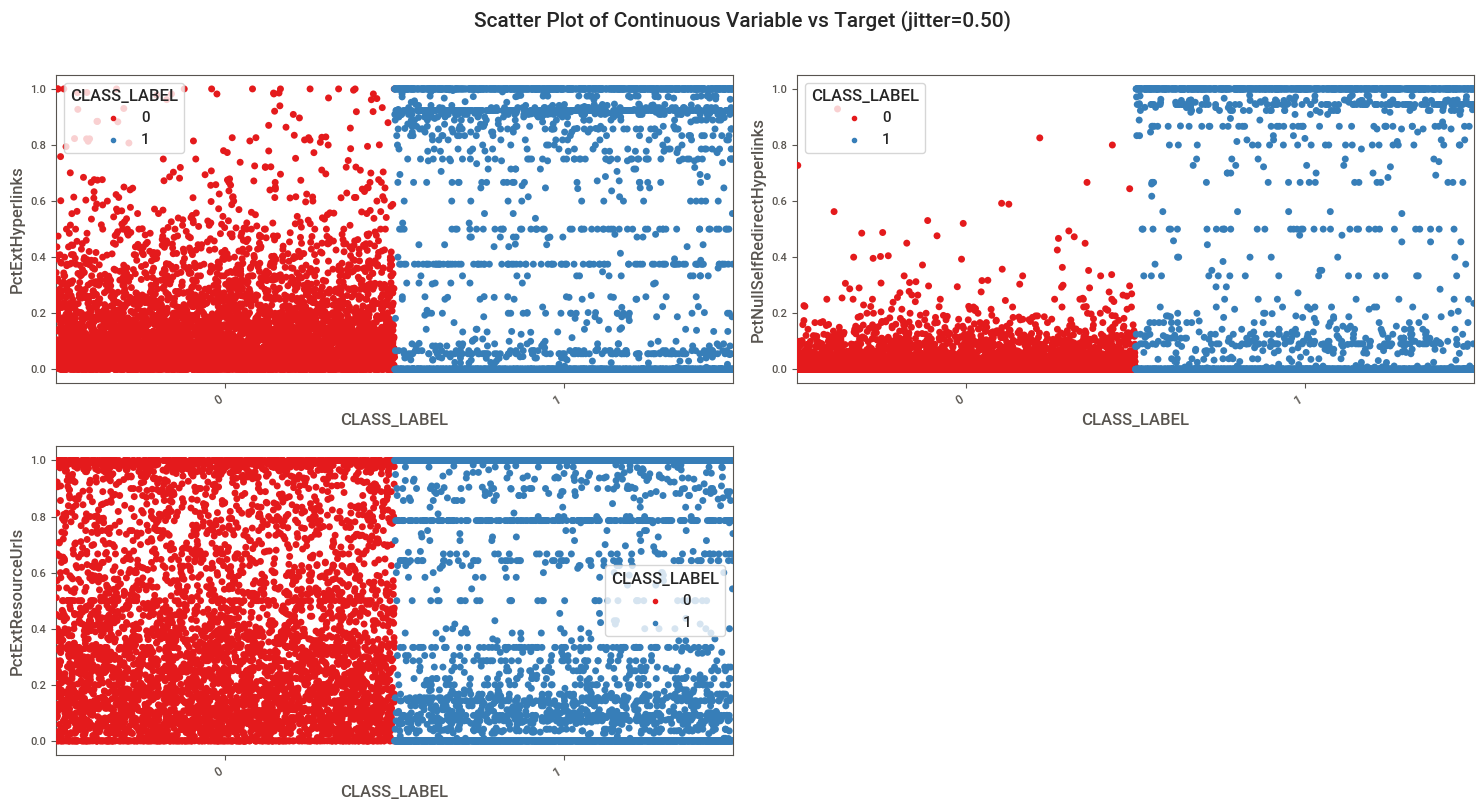

Total Number of Scatter Plots = 6


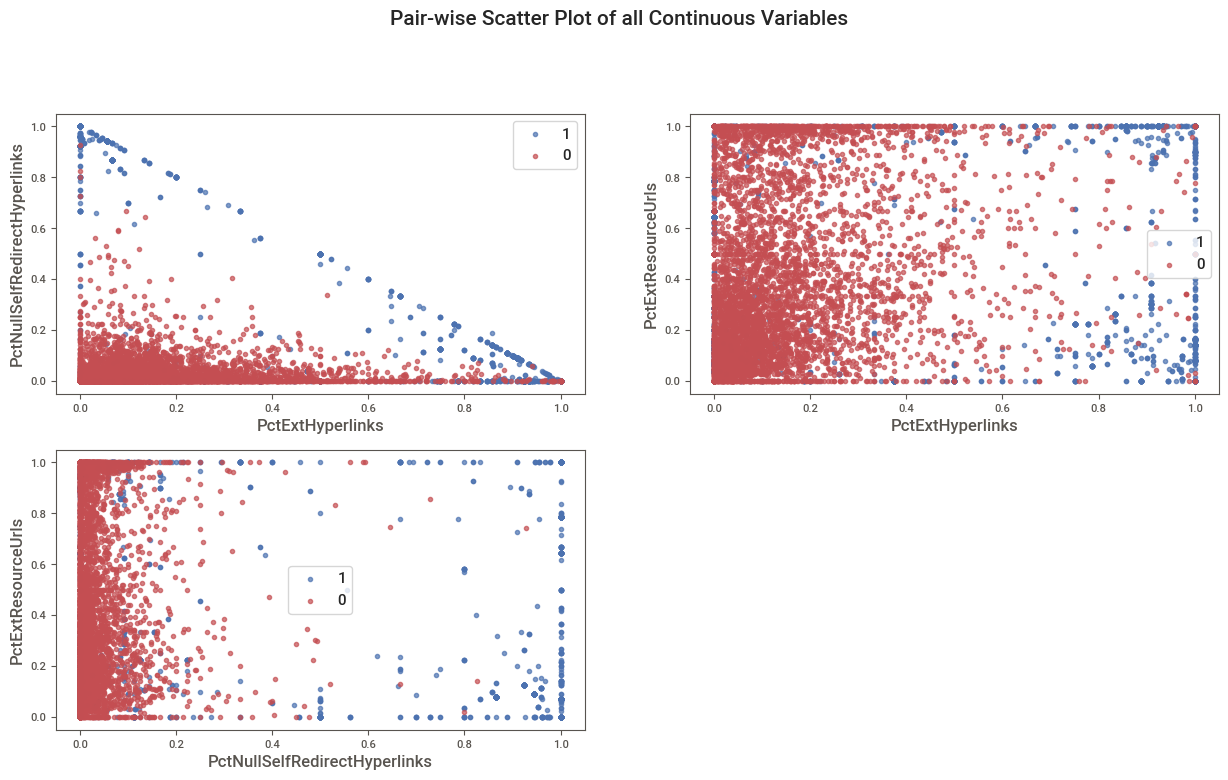

Could not draw some Distribution Plots


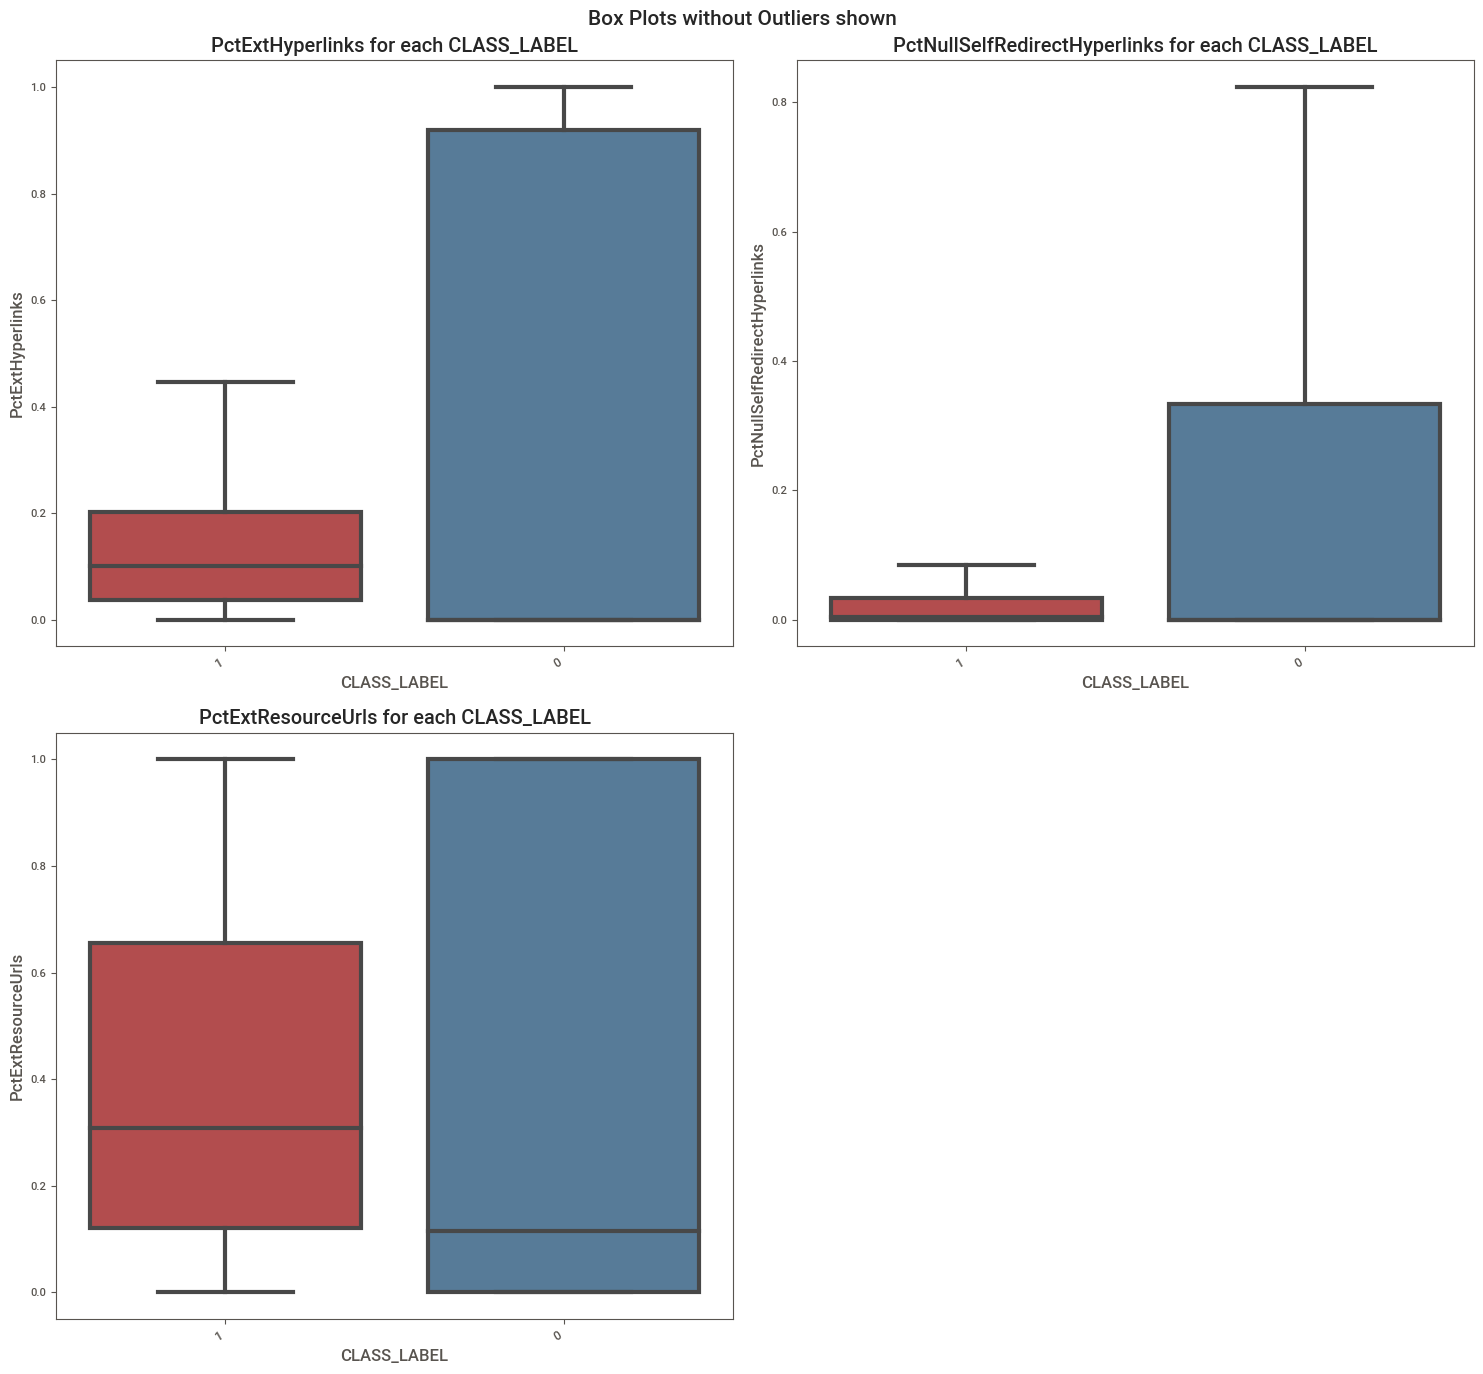

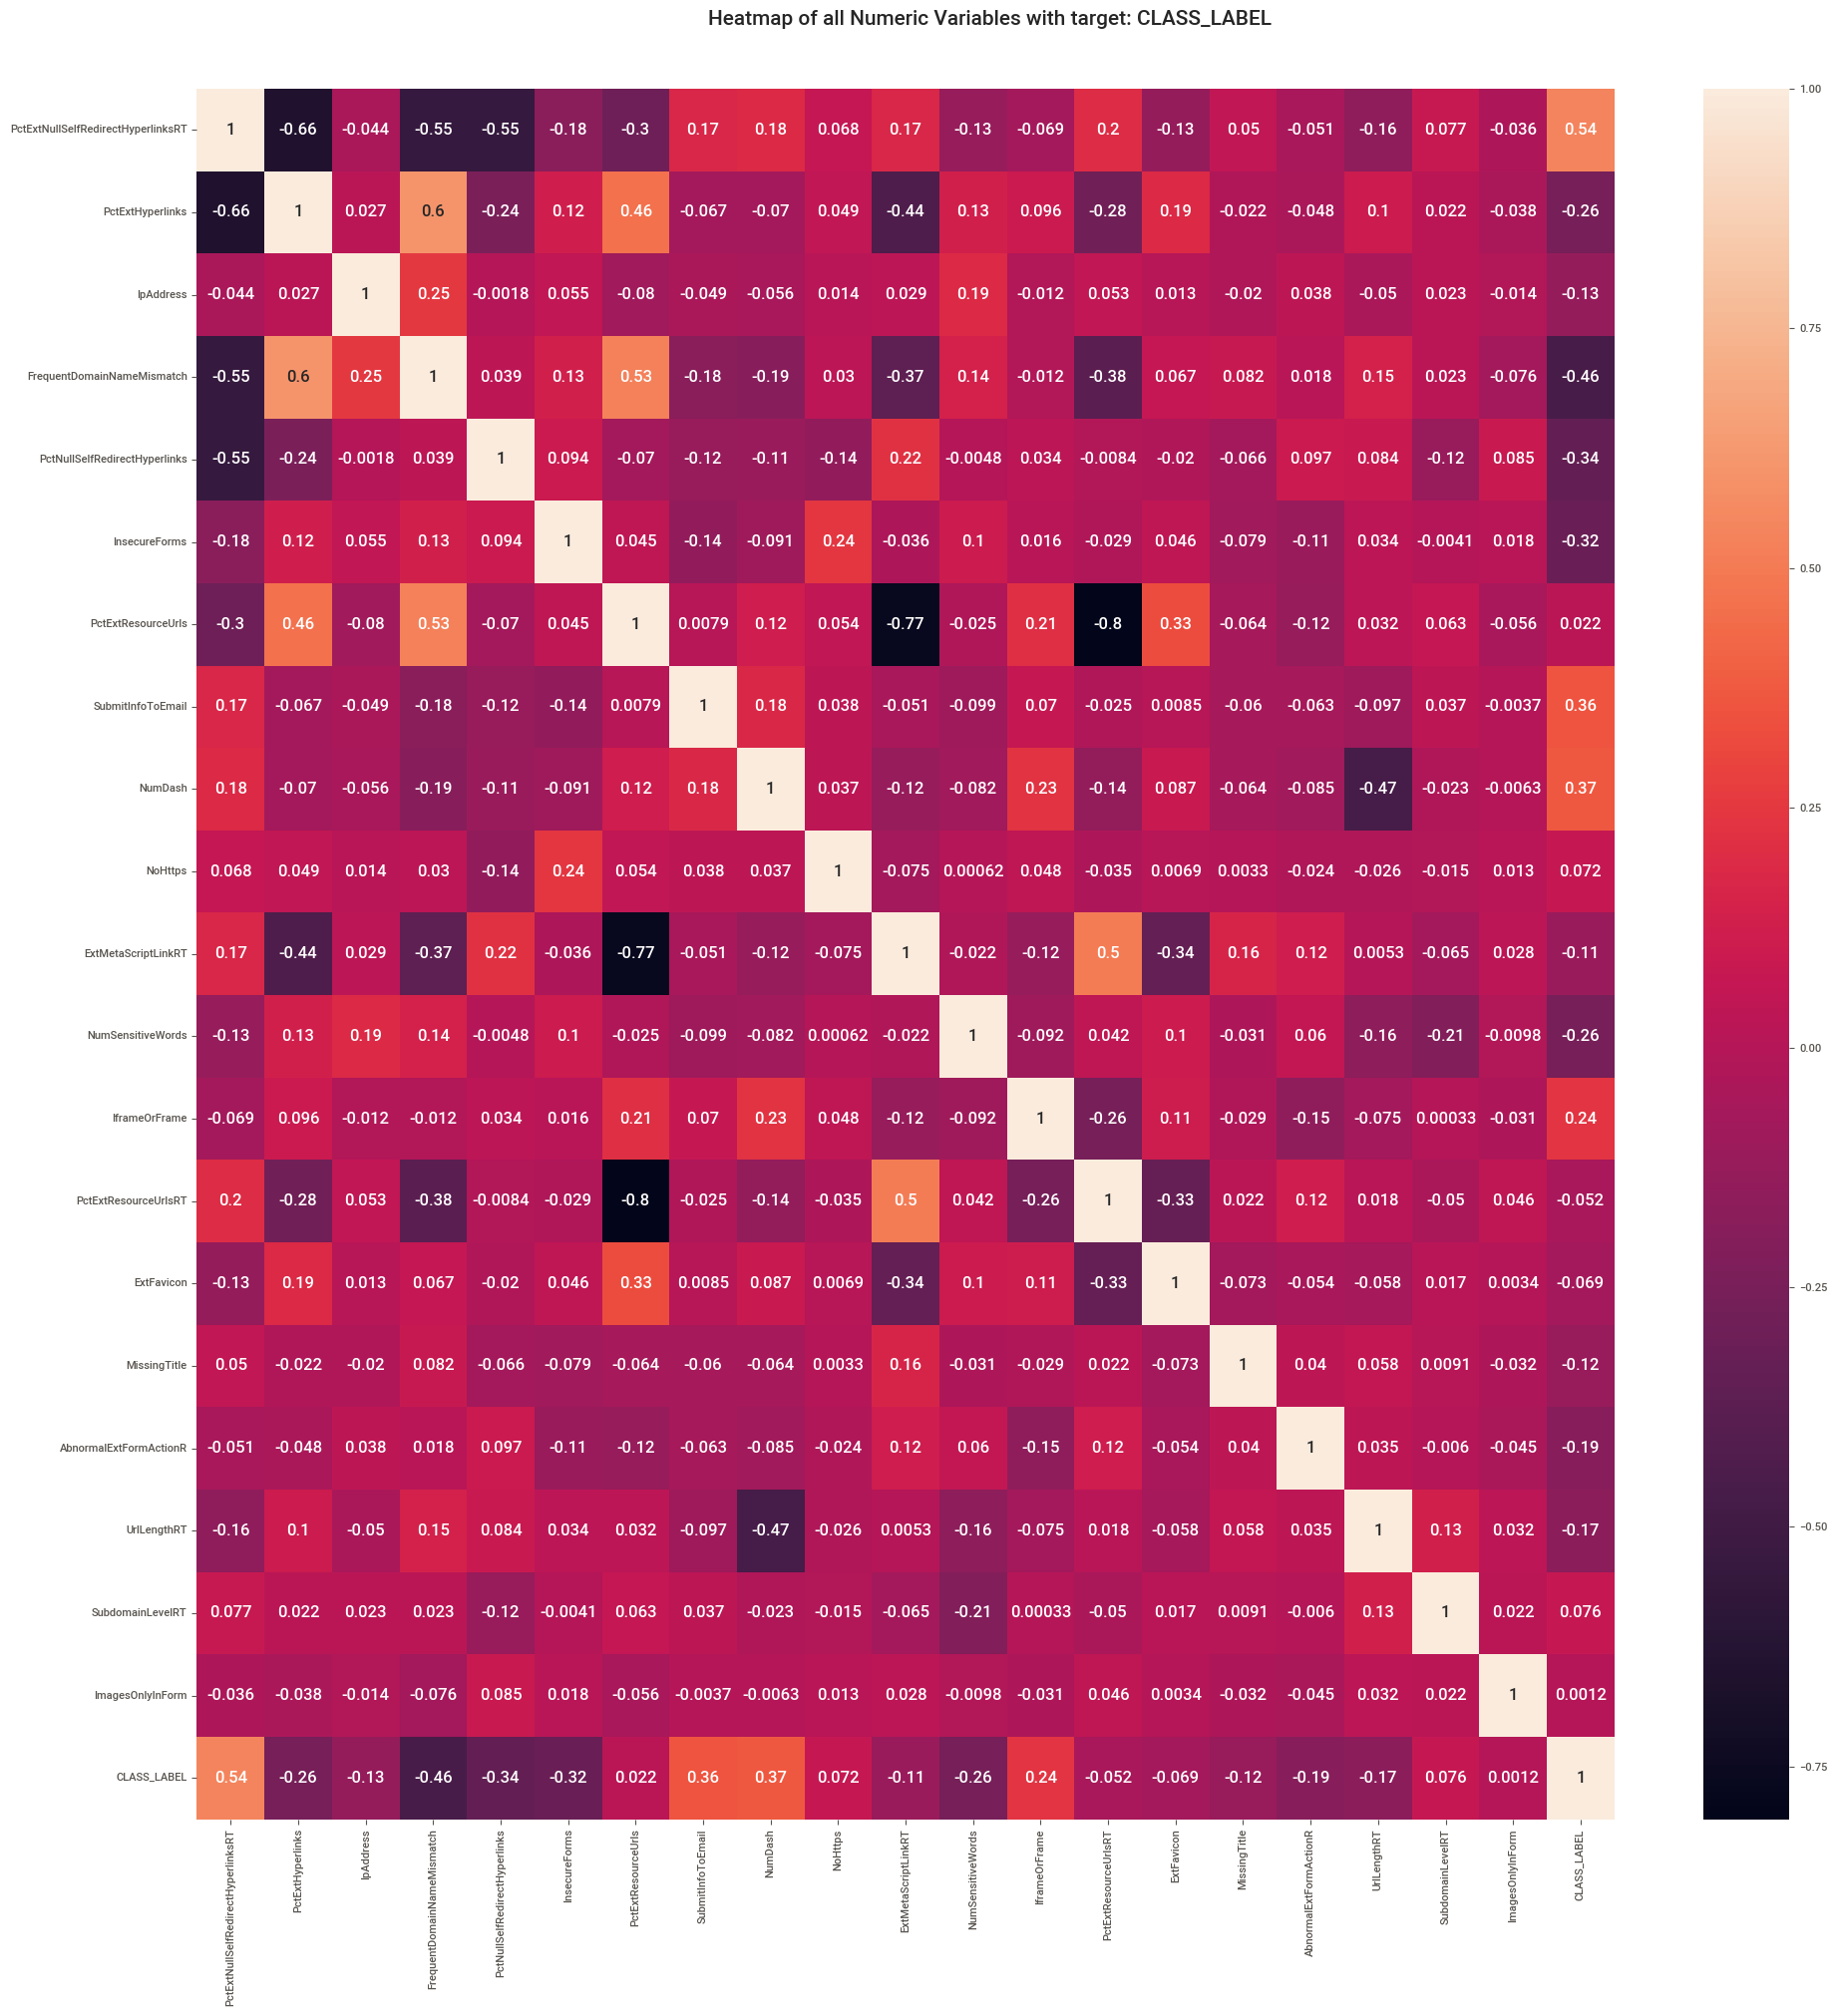

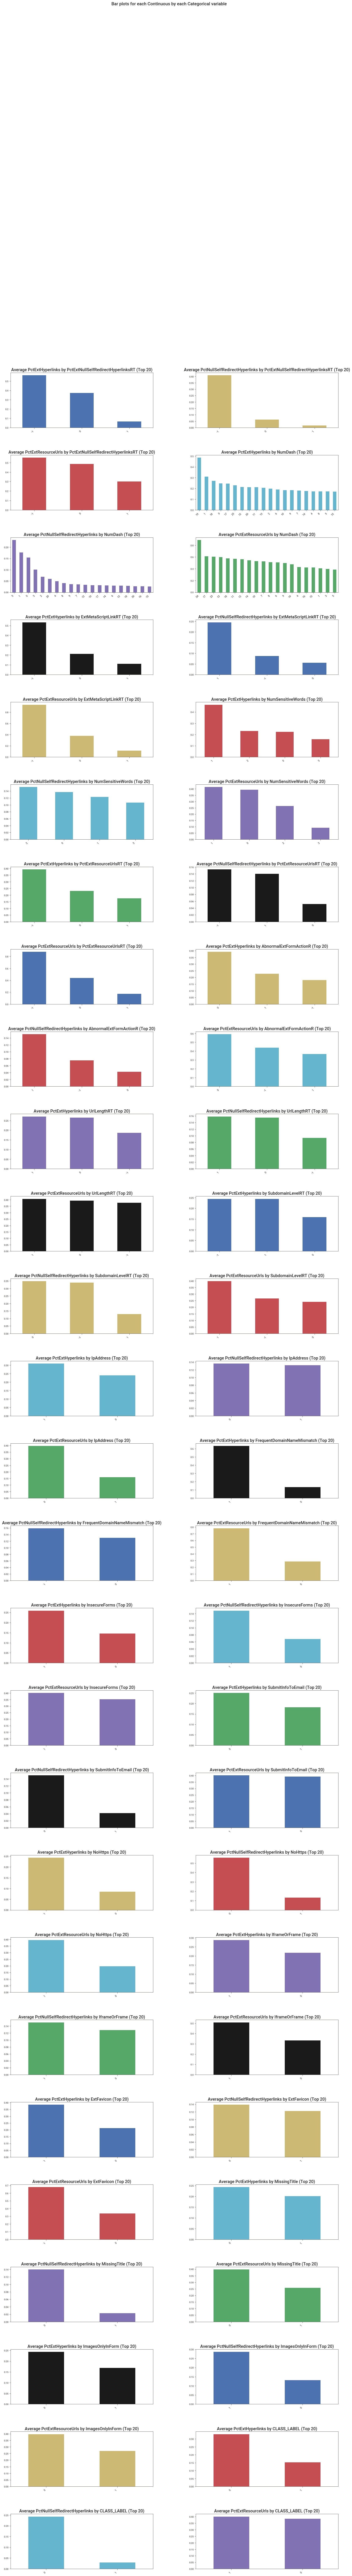

All Plots done
Time to run AutoViz = 18 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks  IpAddress  \
0                      1                      0.000000          0       
1                      1                      0.000000          0       
2                      0                      0.375000          0       
3                     -1                      1.000000          0       
4                     -1                      1.000000          0       
...                                  ...               ...        ...   
9995                   1                      0.096774          0       
9996                   1                      0.161290          0       
9997                   1                      0.070423          0       
9998                   1                      0.166667          0       
9999                   1                      0.089623          0       

      FrequentDomainNameMismatch  PctNullSelfRedirectHyperlinks  \
0                  0                        0.000000              
1                  0                        0.000000              
2                  0                        0.000000              
3                  1                        0.000000              
4                  1                        0.000000              
...                          ...                            ...   
9995               0                        0.000000              
9996               0                        0.129032              
9997               0                        0.056338              
9998               0                        0.000000              
9999               0                        0.004717              

      InsecureForms  PctExtResourceUrls  SubmitInfoToEmail  NumDash  NoHttps  \
0           1             0.250000               0             0        1      
1           1             0.000000               0             0        1      
2           1             1.000000               0             0        1      
3           1             0.095238               1             1        1      
4           0             1.000000               0             0        1      
...             ...                 ...                ...      ...      ...   
9995        1             0.757143               0             0        1      
9996        1             0.275862               0             1        1      
9997        1             0.500000               0             0        1      
9998        1             0.428571               0             0        1      
9999        1             0.042553               0             3        1      

      ExtMetaScriptLinkRT  NumSensitiveWords  IframeOrFrame  \
0             -1                   0                0         
1              1                   1                0         
2             -1                   0                0         
3              1                   0                0         
4             -1                   0                1         
...                   ...                ...            ...   
9995           0                   0                0         
9996           0                   0                1         
9997           0                   0                0         
9998           0                   0                1         
9999           1                   0                0         

      PctExtResourceUrlsRT  ExtFavicon  MissingTitle  AbnormalExtFormActionR  \
0               1                1            0                  1             
1               1                0            0                  1             
2              -1                1            0                  1             
3               1                1            0                  1             
4              -1                0            0                  0             
...                    ...         ...           ...                     ...   
9995           -1                1            

In [43]:
df_auto = AV.AutoViz("phishing_data.csv", depVar = 'CLASS_LABEL')
df_auto

In [ ]:
"""Curr Data is in 64 bit which is taking considerable amount of memory, so we will convert it into 32bit"""

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [45]:
float_cols = df.select_dtypes('float64').columns
for i in float_cols:
    df[i] = df[i].astype('float32')  

int_cols = df.select_dtypes('int64').columns
for i in int_cols:
    df[i] = df[i].astype('int32')

In [46]:
df.info()  #Data is converted to 32 bit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int32  
 1   SubdomainLevel                      10000 non-null  int32  
 2   PathLevel                           10000 non-null  int32  
 3   UrlLength                           10000 non-null  int32  
 4   NumDash                             10000 non-null  int32  
 5   NumDashInHostname                   10000 non-null  int32  
 6   AtSymbol                            10000 non-null  int32  
 7   TildeSymbol                         10000 non-null  int32  
 8   NumUnderscore                       10000 non-null  int32  
 9   NumPercent                          10000 non-null  int32  
 10  NumQueryComponents                  10000 non-null  int32  
 11  NumAmpersand                        10000 

In [67]:
df

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0        3            1            5          72        0      
1        3            1            3         144        0      
2        3            1            2          58        0      
3        3            1            6          79        1      
4        3            0            4          46        0      
...       ...             ...        ...        ...      ...   
9995     3            1            1          50        0      
9996     2            1            4          59        1      
9997     2            1            4          57        0      
9998     3            1            1          49        0      
9999     3            1            2          52        3      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0             0              0          0             0             0       
1             0              0          0             2             0       
2             0              0          0             0             0       
3             0              0          0             0             0       
4             0              0          0             0             0       
...                 ...       ...          ...            ...         ...   
9995          0              0          0             0             0       
9996          0              0          0             0             0       
9997          0              0          0             0             0       
9998          0              0          0             0             0       
9999          0              0          0             0             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0              0                0          0            0            1      
1              2                1          0           41            1      
2              0                0          0            0            1      
3              0                0          0            0            1      
4              0                0          0            2            1      
...                  ...           ...      ...              ...      ...   
9995           2                1          0            9            1      
9996           0                0          0            0            1      
9997           0                0          0            6            1      
9998           1                0          0            3            1      
9999           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0           0           0               0                0         
1           0           0               0                0         
2           0           0               0                0         
3           0           0               0                1         
4           1           0               0                1         
...            ...        ...                 ...            ...   
9995        0           0               0                0         
9996        1           0               0                1         
9997        1           0               0                0         
9998        0           0               0                0         
9999        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0            0               21            44            0       
1            0               17            16          103       
2            0               27            24            0       
3            0               22            50            0       
4            0               10            29            0       
...               ...             ...         ...          ...   
9995         0               15            10           17       
9996         0               19           

In [47]:
df.rename(columns = {'CLASS_LABEL': 'labels' }, inplace = True)

In [48]:
df.sample(10)

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
4261     2            0            3          54        0      
6260     4            2            2          95        0      
7458     2            0            5          73        1      
1685     3            1            3          52        0      
4518     3            0            3          39        0      
2910     2            1            8          60        0      
2305     2            0            3          43        0      
6283     3            0            2          61        1      
6129     3            1            3         106        8      
4757     3            1            4          66        1      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
4261          0              0          0             0             0       
6260          0              0          0             1             0       
7458          0              0          0             1             0       
1685          0              0          0             0             0       
4518          0              0          0             0             0       
2910          0              0          0             0             0       
2305          0              0          0             0             0       
6283          1              0          0             0             0       
6129          0              0          0             0             0       
4757          0              0          0             1             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
4261           0                0          0            0            1      
6260           3                2          0           10            1      
7458           0                0          0           16            1      
1685           0                0          0            0            1      
4518           0                0          0            0            1      
2910           0                0          0            0            1      
2305           0                0          0            0            1      
6283           1                0          0           11            1      
6129           0                0          0            7            1      
4757           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
4261        0           0               0                1         
6260        1           0               0                0         
7458        1           0               0                0         
1685        0           0               0                0         
4518        0           0               0                1         
2910        1           0               0                0         
2305        0           0               0                1         
6283        1           0               0                0         
6129        1           0               0                1         
4757        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
4261         0               20            27           0        
6260         0               26            18          43        
7458         0               18            48           0        
1685         0               22            23           0        
4518         0               10            22           0        
2910         0               21            32           0        
2305         0               15            21           0        
6283         0               14            18          21        
6129         0               24            75           0        
4757         0               17            42           0        

      DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  \
4261          0                  0                  0           

In [49]:
df.describe()

NumDots    SubdomainLevel    PathLevel     UrlLength      NumDash    \
count  10000.000000   10000.000000   10000.000000  10000.000000  10000.000000   
mean       2.445100       0.586800       3.300300     70.264100      1.818000   
std        1.346836       0.751214       1.863241     33.369877      3.106258   
min        1.000000       0.000000       0.000000     12.000000      0.000000   
25%        2.000000       0.000000       2.000000     48.000000      0.000000   
50%        2.000000       1.000000       3.000000     62.000000      0.000000   
75%        3.000000       1.000000       4.000000     84.000000      2.000000   
max       21.000000      14.000000      18.000000    253.000000     55.000000   

       NumDashInHostname    AtSymbol     TildeSymbol  NumUnderscore  \
count    10000.000000     10000.000000  10000.000000   10000.00000    
mean         0.138900         0.000300      0.013100       0.32320    
std          0.545744         0.017319      0.113709       1.11466    
min          0.000000         0.000000      0.000000       0.00000    
25%          0.000000         0.000000      0.000000       0.00000    
50%          0.000000         0.000000      0.000000       0.00000    
75%          0.000000         0.000000      0.000000       0.00000    
max          9.000000         1.000000      1.000000      18.00000    

        NumPercent   NumQueryComponents  NumAmpersand     NumHash    \
count  10000.000000     10000.000000     10000.000000  10000.000000   
mean       0.073800         0.458600         0.277200      0.002300   
std        0.622248         1.344793         1.117356      0.047906   
min        0.000000         0.000000         0.000000      0.000000   
25%        0.000000         0.000000         0.000000      0.000000   
50%        0.000000         0.000000         0.000000      0.000000   
75%        0.000000         0.000000         0.000000      0.000000   
max       19.000000        23.000000        22.000000      1.000000   

       NumNumericChars     NoHttps    RandomString    IpAddress   \
count   10000.000000    10000.000000   10000.00000  10000.000000   
mean        5.810300        0.988800       0.52520      0.017200   
std         9.617877        0.105241       0.49939      0.130023   
min         0.000000        0.000000       0.00000      0.000000   
25%         0.000000        1.000000       0.00000      0.000000   
50%         2.000000        1.000000       1.00000      0.000000   
75%         8.000000        1.000000       1.00000      0.000000   
max       111.000000        1.000000       1.00000      1.000000   

       DomainInSubdomains  DomainInPaths  HttpsInHostname  HostnameLength  \
count     10000.000000     10000.000000       10000.0        10000.00000    
mean          0.022200         0.428900           0.0           18.82430    
std           0.147341         0.494944           0.0            8.11654    
min           0.000000         0.000000           0.0            4.00000    
25%           0.000000         0.000000           0.0           14.00000    
50%           0.000000         0.000000           0.0           18.00000    
75%           0.000000         1.000000           0.0           22.00000    
max           1.000000         1.000000           0.0          137.00000    

        PathLength    QueryLength  DoubleSlashInPath  NumSensitiveWords  \
count  10000.000000  10000.000000    10000.000000       10000.000000      
mean      35.564900      8.606500        0.000900           0.109300      
std       24.588502     24.313053        0.029988           0.368737      
min        0.000000      0.000000        0.000000           0.000000      
25%       18.000000      0.000000        0.000000           0.000000      
50%       30.000000      0.000000        0.000000           0.000000      
75%       48.000000      0.000000        0.000000           0.000000      
max      161.000000    188.000000        1.000000           3.000000      

       EmbeddedBr

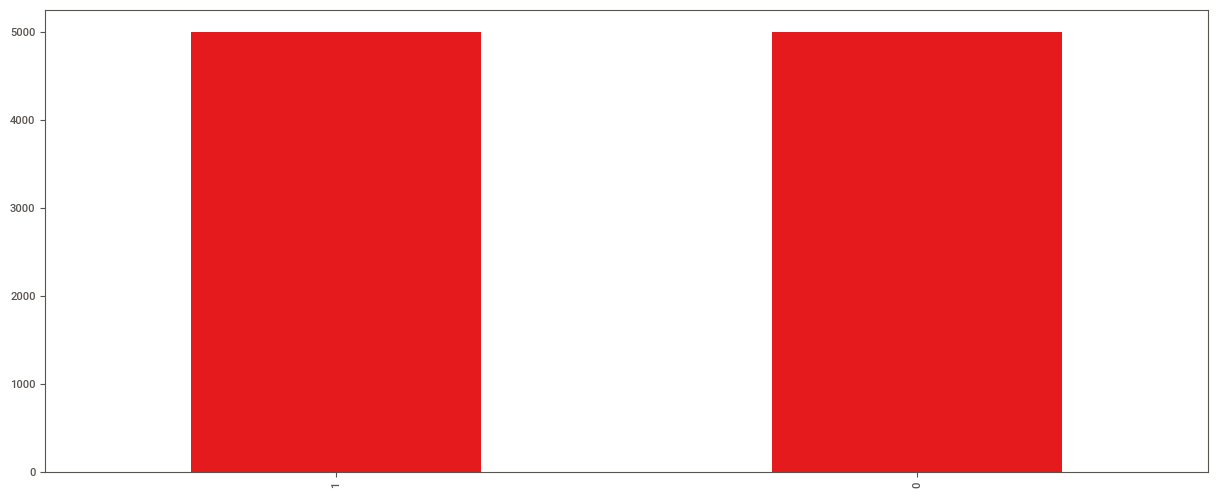

In [50]:
df['labels'].value_counts().plot(kind = 'bar')
plt.show()

In [25]:
df

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0        3            1            5          72        0      
1        3            1            3         144        0      
2        3            1            2          58        0      
3        3            1            6          79        1      
4        3            0            4          46        0      
...       ...             ...        ...        ...      ...   
9995     3            1            1          50        0      
9996     2            1            4          59        1      
9997     2            1            4          57        0      
9998     3            1            1          49        0      
9999     3            1            2          52        3      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0             0              0          0             0             0       
1             0              0          0             2             0       
2             0              0          0             0             0       
3             0              0          0             0             0       
4             0              0          0             0             0       
...                 ...       ...          ...            ...         ...   
9995          0              0          0             0             0       
9996          0              0          0             0             0       
9997          0              0          0             0             0       
9998          0              0          0             0             0       
9999          0              0          0             0             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0              0                0          0            0            1      
1              2                1          0           41            1      
2              0                0          0            0            1      
3              0                0          0            0            1      
4              0                0          0            2            1      
...                  ...           ...      ...              ...      ...   
9995           2                1          0            9            1      
9996           0                0          0            0            1      
9997           0                0          0            6            1      
9998           1                0          0            3            1      
9999           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0           0           0               0                0         
1           0           0               0                0         
2           0           0               0                0         
3           0           0               0                1         
4           1           0               0                1         
...            ...        ...                 ...            ...   
9995        0           0               0                0         
9996        1           0               0                1         
9997        1           0               0                0         
9998        0           0               0                0         
9999        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0            0               21            44            0       
1            0               17            16          103       
2            0               27            24            0       
3            0               22            50            0       
4            0               10            29            0       
...               ...             ...         ...          ...   
9995         0               15            10           17       
9996         0               19           

In [72]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()   

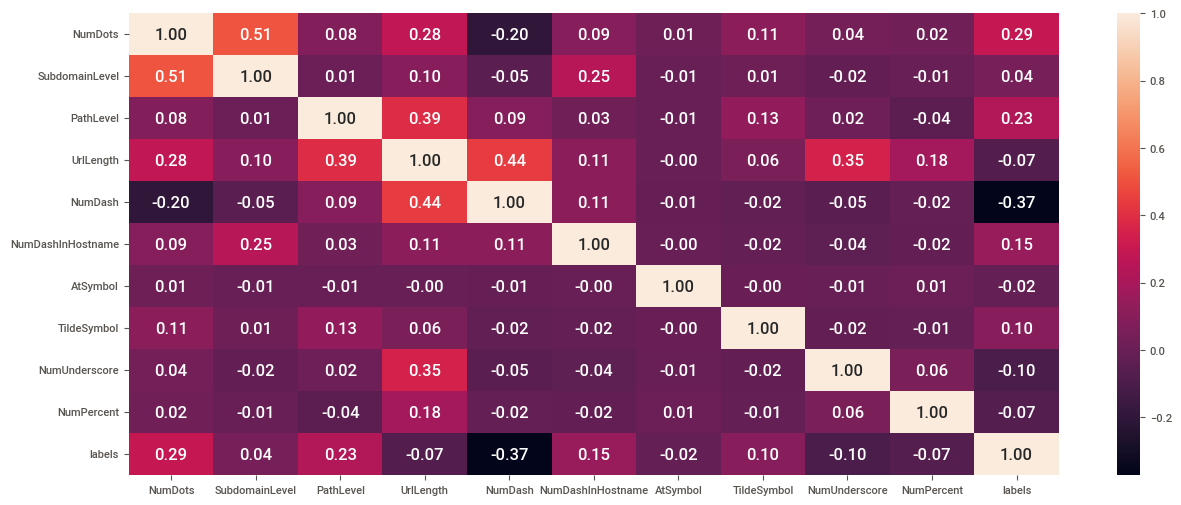

In [60]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] =(15,6)
corr_heatmap(df, 0, 10)

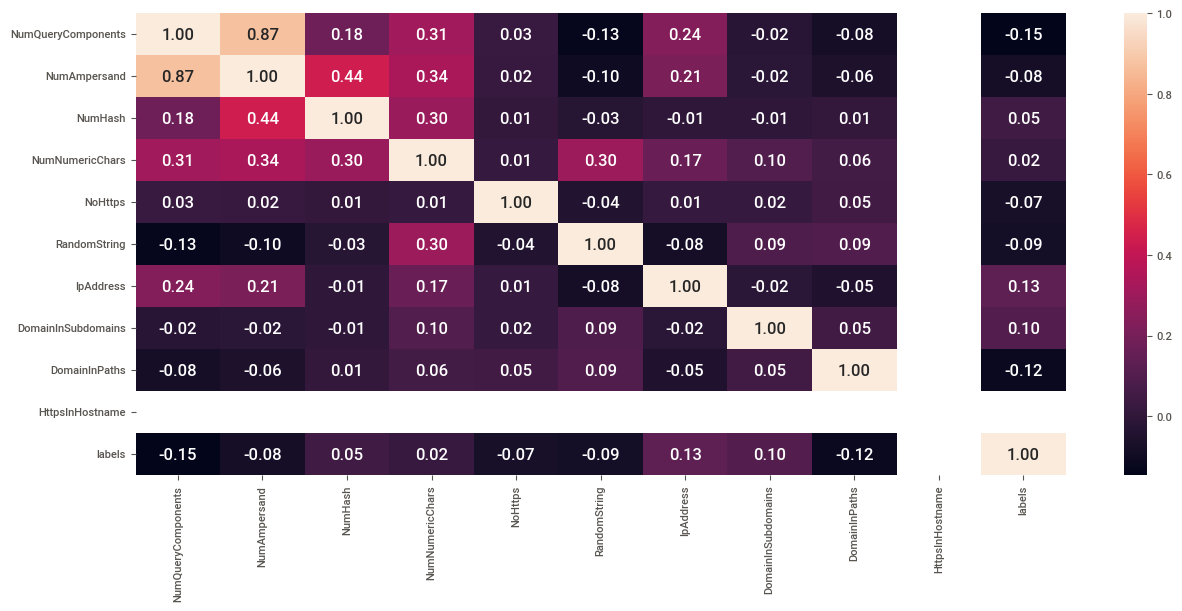

In [61]:
corr_heatmap(df, 10, 20)

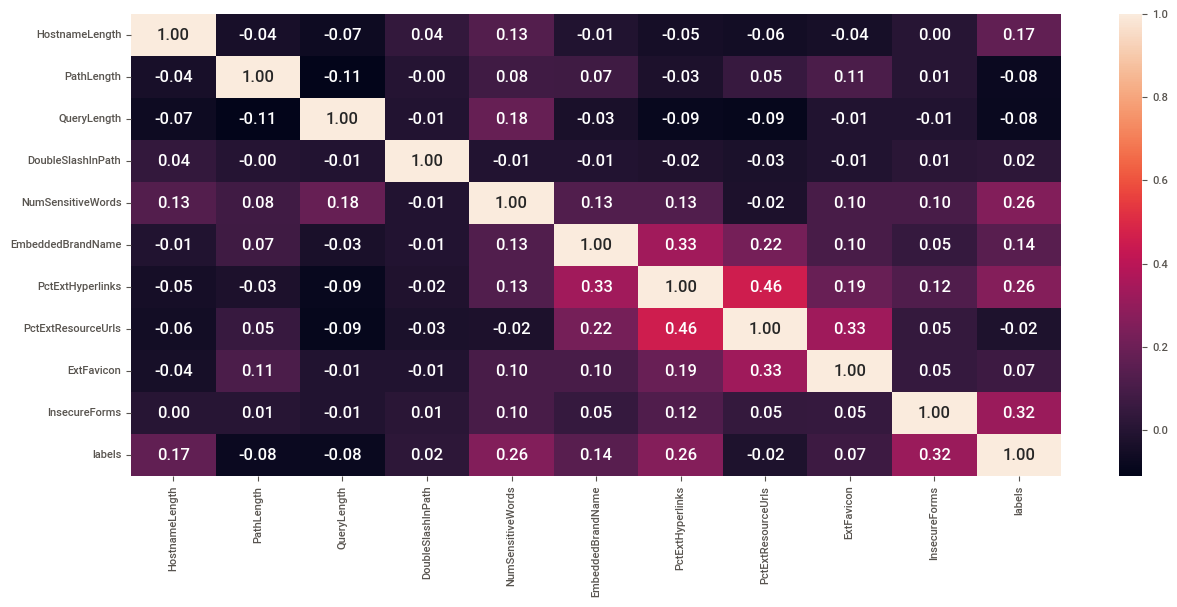

In [62]:
corr_heatmap(df, 20, 30)

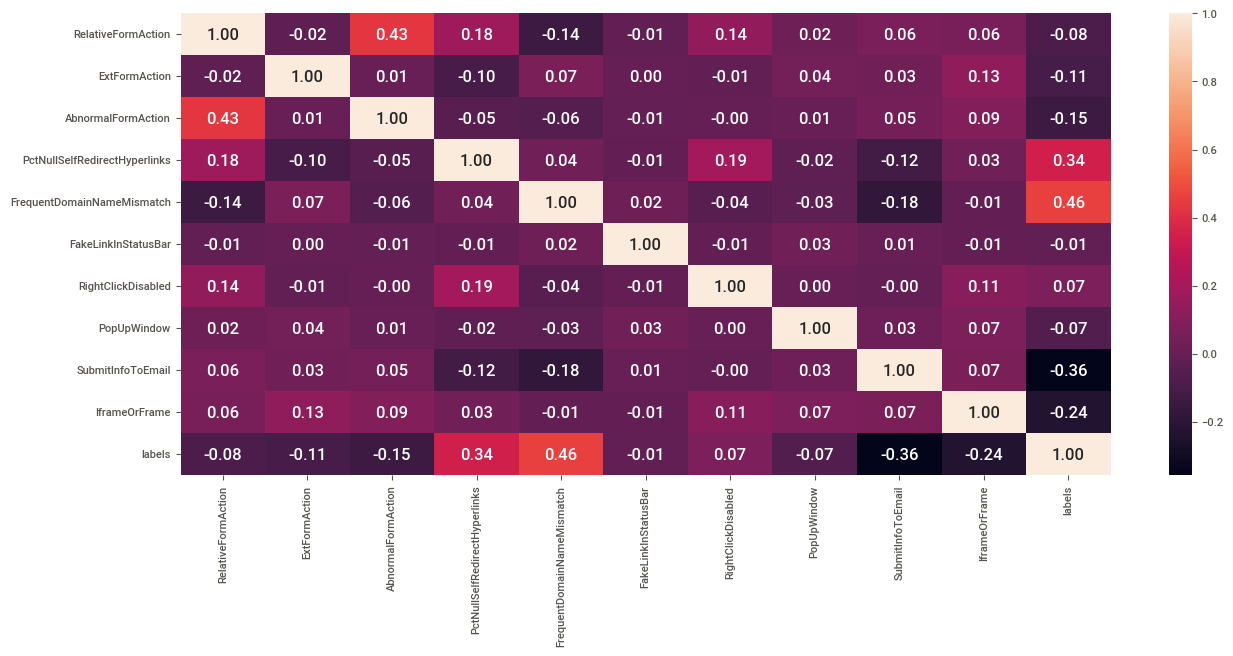

In [63]:
corr_heatmap(df, 30, 40)

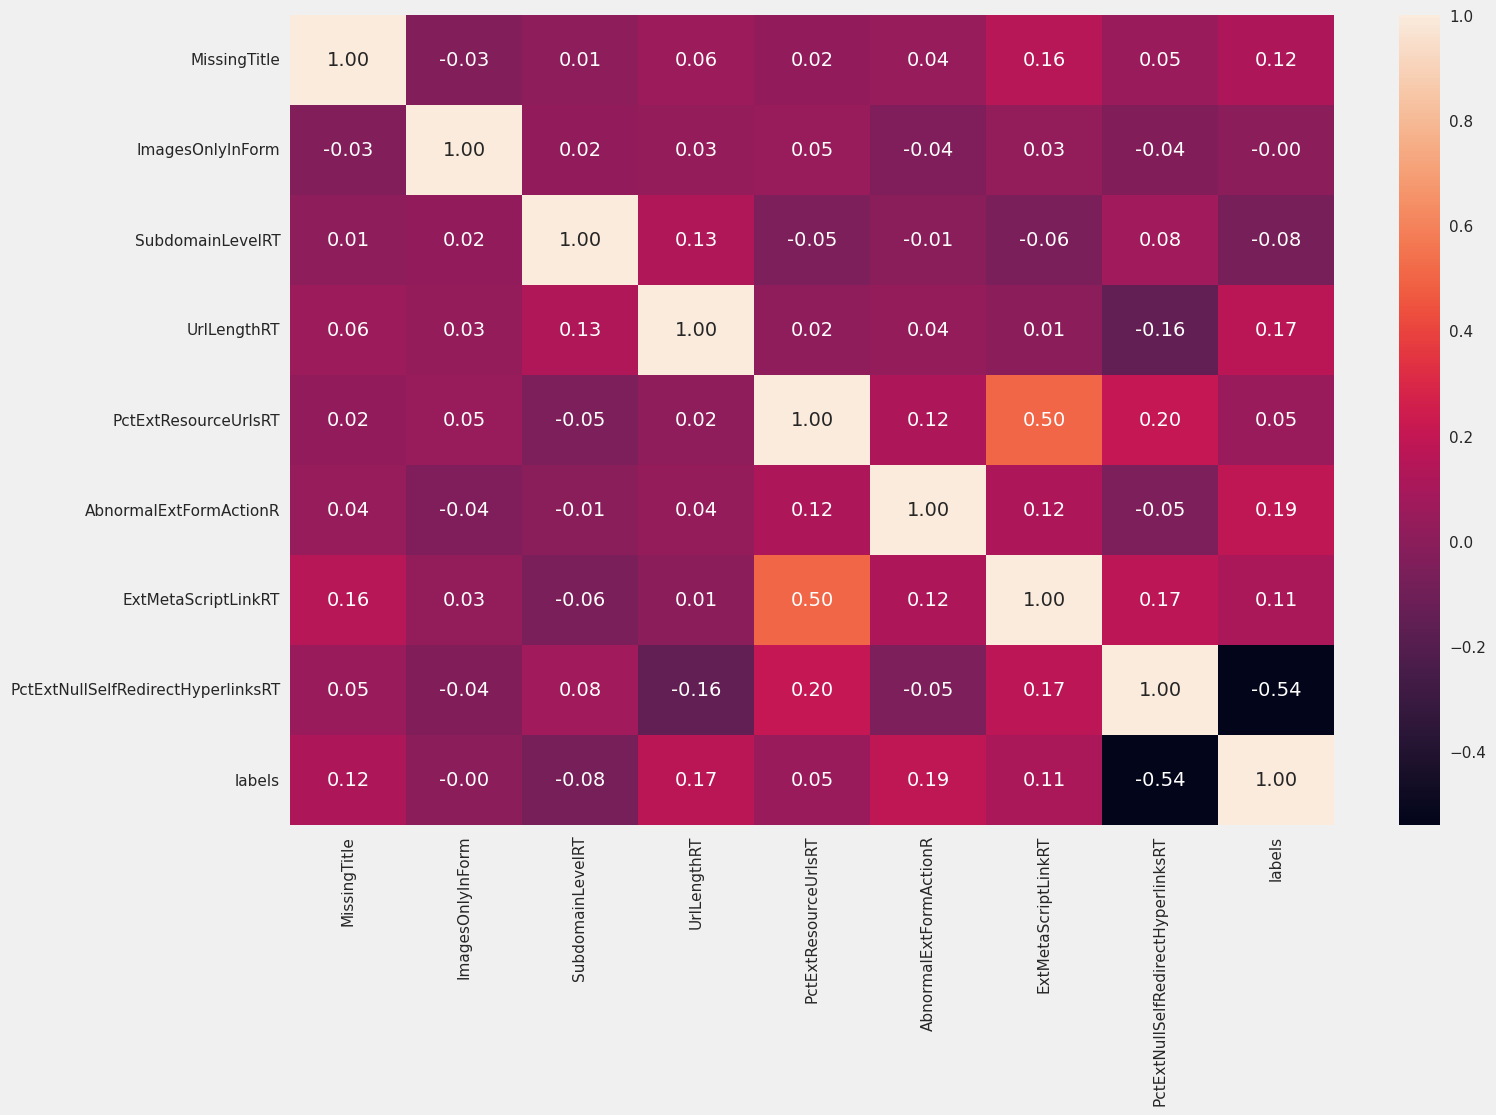

In [ ]:
corr_heatmap(df, 40, 50)

In [64]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('labels', axis =1)
y = df['labels']

discrete_features = X.dtypes == int


In [65]:
mi_score = mutual_info_classif(X, y, discrete_features = discrete_features)
mi_score = pd.Series(mi_score, name = "MI score", index = X.columns)
mi_score = mi_score.sort_values(ascending = False)
mi_score

PctExtHyperlinks                      4.631184e-01
PctExtResourceUrls                    2.930505e-01
PctNullSelfRedirectHyperlinks         2.313066e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

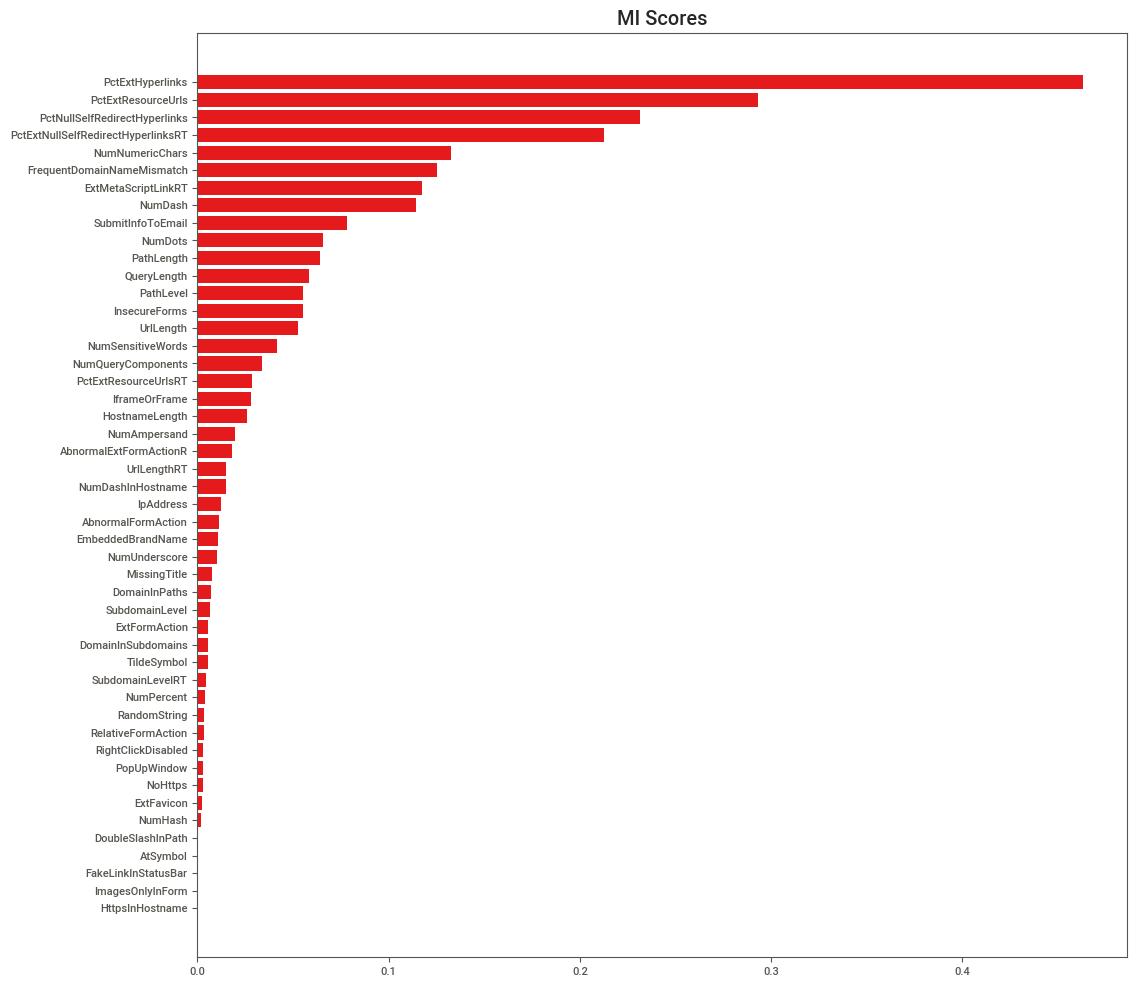

In [66]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")

plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_score)

In [78]:
!pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\dell\anaconda3\python.exe -m pip install --upgrade pip


In [ ]:
"""Install or upgrade the pip using cmd or terminal"""

In [82]:
!pip install cuml

  Using cached cuml-0.6.1.post1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for cuml
Failed to build cuml


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [45 lines of output]
  running bdist_wheel
  running build
  C:\Users\dell\anaconda3\lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
  !!
  
          ********************************************************************************
          Please avoid running ``setup.py`` directly.
          Instead, use pypa/build, pypa/installer or other
          standards-based tools.
  
          See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
          ********************************************************************************
  
  !!
    self.initialize_options()
  installing to build\bdist.win-amd64\wheel
  running install
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users

In [ ]:
"""If it doesn't install from the command then we can also install it by simply cloning the repo of cuML RAPIDS"""

In [83]:
!git clone https://github.com/rapidsai/cuml.git


Cloning into 'cuml'...
Updating files:  84% (996/1179)
Updating files:  85% (1003/1179)
Updating files:  86% (1014/1179)
Updating files:  87% (1026/1179)
Updating files:  88% (1038/1179)
Updating files:  89% (1050/1179)
Updating files:  90% (1062/1179)
Updating files:  91% (1073/1179)
Updating files:  92% (1085/1179)
Updating files:  93% (1097/1179)
Updating files:  94% (1109/1179)
Updating files:  95% (1121/1179)
Updating files:  96% (1132/1179)
Updating files:  97% (1144/1179)
Updating files:  98% (1156/1179)
Updating files:  99% (1168/1179)
Updating files: 100% (1179/1179)
Updating files: 100% (1179/1179), done.


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [85]:
def train_logistic(data, top_n):
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy






In [86]:
arr = []
for i in range(20,51):
    precision, recall, f1, accuracy = train_logistic(df, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])



Performance for Logistic Model with Top 20 features is precision : 0.9022770398481973, recall : 0.9387956564659428, f1 score : 0.9201741654571842, accuracy : 0.9175
Performance for Logistic Model with Top 21 features is precision : 0.9176470588235294, recall : 0.9388164493480441, f1 score : 0.9281110560237977, accuracy : 0.9275
Performance for Logistic Model with Top 22 features is precision : 0.8846153846153846, recall : 0.934010152284264, f1 score : 0.9086419753086419, accuracy : 0.9075
Performance for Logistic Model with Top 23 features is precision : 0.9170731707317074, recall : 0.9409409409409409, f1 score : 0.9288537549407114, accuracy : 0.928
Performance for Logistic Model with Top 24 features is precision : 0.9041095890410958, recall : 0.9380710659898477, f1 score : 0.9207772795216741, accuracy : 0.9205
Performance for Logistic Model with Top 25 features is precision : 0.9053140096618357, recall : 0.93419740777667, f1 score : 0.9195289499509323, accuracy : 0.918
Performance for

In [87]:
df_log = pd.DataFrame(arr, columns = ['Number of feature', 'precisions', 'recall', 'f1-score', 'accuracy'])
df_log

Number of feature  precisions   recall   f1-score  accuracy
0          20           0.902277   0.938796  0.920174   0.9175 
1          21           0.917647   0.938816  0.928111   0.9275 
2          22           0.884615   0.934010  0.908642   0.9075 
3          23           0.917073   0.940941  0.928854   0.9280 
4          24           0.904110   0.938071  0.920777   0.9205 
5          25           0.905314   0.934197  0.919529   0.9180 
6          26           0.912584   0.942460  0.927282   0.9255 
7          27           0.921212   0.942149  0.931563   0.9330 
8          28           0.910537   0.930894  0.920603   0.9210 
9          29           0.910593   0.941709  0.925889   0.9250 
10         30           0.915339   0.934893  0.925013   0.9255 
11         31           0.901235   0.933137  0.916908   0.9140 
12         32           0.911046   0.923687  0.917323   0.9160 
13         33           0.915493   0.946930  0.930946   0.9325 
14         34           0.922222   0.937372  0.929735   0.9310 
15         35           0.902414   0.932432  0.917178   0.9190 
16         36           0.917339   0.952880  0.934771   0.9365 
17         37           0.908390   0.933598  0.920821   0.9190 
18         38           0.933268   0.941584  0.937408   0.9365 
19         39           0.916185   0.950050  0.932810   0.9315 
20         40           0.912875   0.947739  0.929980   0.9290 
21         41           0.914201   0.950769  0.932127   0.9325 
22         42           0.905697   0.947585  0.926168   0.9265 
23         43           0.914230   0.954222  0.933798   0.9335 
24         44           0.917466   0.954092  0.935421   0.9340 
25         45           0.922756   0.943436  0.932982   0.9365 
26         46           0.930703   0.947111  0.938835   0.9370 
27         47           0.928210   0.934827  0.931507   0.9325 
28         48           0.910405   0.931034  0.920604   0.9185 
29         49           0.912791   0.942000  0.927165   0.9260 
30         50           0.920870   0.930070  0.925447   0.9250

<Axes: xlabel='Number of feature', ylabel='precisions'>

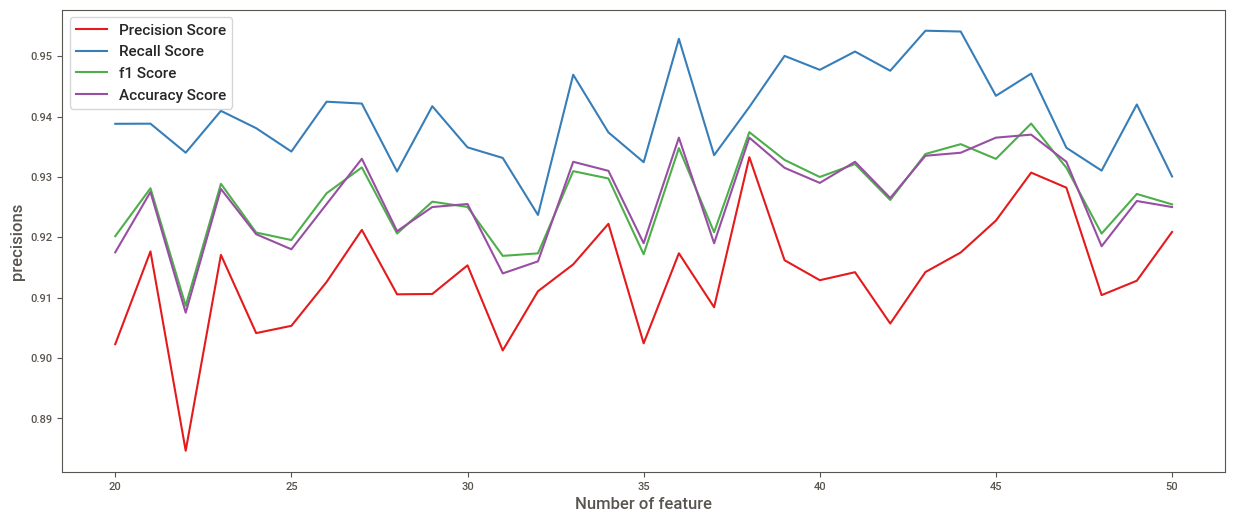

In [88]:
sns.lineplot(x = 'Number of feature', y = 'precisions', data = df_log, label = 'Precision Score')
sns.lineplot(x = 'Number of feature', y = 'recall', data = df_log, label = 'Recall Score')
sns.lineplot(x = 'Number of feature', y = 'f1-score', data = df_log, label = 'f1 Score')
sns.lineplot(x = 'Number of feature', y = 'accuracy', data = df_log, label = 'Accuracy Score')

In [89]:
def train_rfc(data, top_n):
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
    rfc = RandomForestClassifier(n_estimators=500,
                criterion='entropy',
                max_depth=32,
                max_features=1.0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy



In [90]:
arr1 = []
for i in range(20,51):
    precision, recall, f1, accuracy = train_rfc(df, i)
    print("Performance for RandomForestClassifier Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr1.append([i, precision, recall, f1, accuracy])



Performance for RandomForestClassifier Model with Top 20 features is precision : 0.9731800766283525, recall : 0.9788053949903661, f1 score : 0.9759846301633045, accuracy : 0.975
Performance for RandomForestClassifier Model with Top 21 features is precision : 0.9756345177664975, recall : 0.9796126401630989, f1 score : 0.9776195320447609, accuracy : 0.978
Performance for RandomForestClassifier Model with Top 22 features is precision : 0.9757516973811833, recall : 0.982421875, f1 score : 0.9790754257907542, accuracy : 0.9785
Performance for RandomForestClassifier Model with Top 23 features is precision : 0.9801192842942346, recall : 0.9723865877712031, f1 score : 0.9762376237623762, accuracy : 0.976
Performance for RandomForestClassifier Model with Top 24 features is precision : 0.968937875751503, recall : 0.9877425944841676, f1 score : 0.9782498735457765, accuracy : 0.9785
Performance for RandomForestClassifier Model with Top 25 features is precision : 0.975024975024975, recall : 0.97991

In [91]:
df_rfc = pd.DataFrame(arr1, columns = ['Number of feature', 'precisions', 'recall', 'f1-score', 'accuracy'])
df_rfc

Number of feature  precisions   recall   f1-score  accuracy
0          20           0.973180   0.978805  0.975985   0.9750 
1          21           0.975635   0.979613  0.977620   0.9780 
2          22           0.975752   0.982422  0.979075   0.9785 
3          23           0.980119   0.972387  0.976238   0.9760 
4          24           0.968938   0.987743  0.978250   0.9785 
5          25           0.975025   0.979920  0.977466   0.9775 
6          26           0.975806   0.974824  0.975315   0.9755 
7          27           0.983479   0.989247  0.986355   0.9860 
8          28           0.977000   0.979940  0.978468   0.9785 
9          29           0.976721   0.977710  0.977215   0.9775 
10         30           0.968285   0.968285  0.968285   0.9680 
11         31           0.973442   0.971458  0.972449   0.9730 
12         32           0.982143   0.973451  0.977778   0.9775 
13         33           0.981678   0.977906  0.979788   0.9790 
14         34           0.978000   0.984894  0.981435   0.9815 
15         35           0.977228   0.976261  0.976744   0.9765 
16         36           0.979631   0.981535  0.980583   0.9800 
17         37           0.973607   0.979351  0.976471   0.9760 
18         38           0.972387   0.986000  0.979146   0.9790 
19         39           0.980198   0.985075  0.982630   0.9825 
20         40           0.983135   0.982161  0.982647   0.9825 
21         41           0.973786   0.978537  0.976156   0.9755 
22         42           0.979310   0.979310  0.979310   0.9790 
23         43           0.984940   0.977092  0.981000   0.9810 
24         44           0.981946   0.979980  0.980962   0.9810 
25         45           0.967380   0.986486  0.976840   0.9775 
26         46           0.980040   0.985944  0.982983   0.9830 
27         47           0.981891   0.981891  0.981891   0.9820 
28         48           0.975345   0.979208  0.977273   0.9770 
29         49           0.975845   0.984405  0.980107   0.9795 
30         50           0.974063   0.986381  0.980184   0.9795

<Axes: xlabel='Number of feature', ylabel='precisions'>

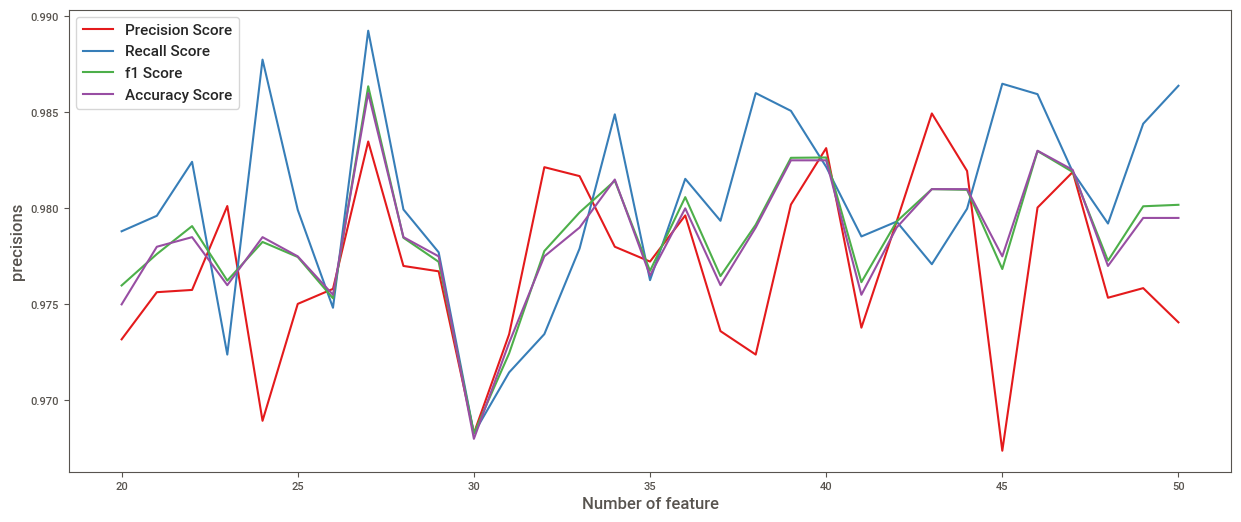

In [92]:
sns.lineplot(x = 'Number of feature', y = 'precisions', data = df_rfc, label = 'Precision Score')
sns.lineplot(x = 'Number of feature', y = 'recall', data = df_rfc, label = 'Recall Score')
sns.lineplot(x = 'Number of feature', y = 'f1-score', data = df_rfc, label = 'f1 Score')
sns.lineplot(x = 'Number of feature', y = 'accuracy', data = df_rfc, label = 'Accuracy Score')

In [94]:
top_n_features = mi_score.sort_values(ascending=False).head(38).index.tolist()
X = df[top_n_features]
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
rfc = RandomForestClassifier(n_estimators=500,
            criterion='entropy',
            max_depth=32,
            max_features=1.0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [95]:
print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(38, precision, recall, f1, accuracy))

Performance for RFC Model with Top 38 features is precision : 0.9782608695652174, recall : 0.981169474727453, f1 score : 0.9797130133597229, accuracy : 0.9795


In [96]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       991
           1       0.98      0.98      0.98      1009

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

[[969  22]
 [ 19 990]]
